In [1]:
import sys
sys.path.append('../SpectralMechanicsAnalysis')
from simulations import simulate_trajectory
from models import G_Maxwell, G_Kelvin_Voigt, G_fractional_Kelvin_Voigt, PSD
#from analyze_data import Laplace_NLL
import matplotlib.pyplot as plt
import numpy as np
from data_handeling import Data

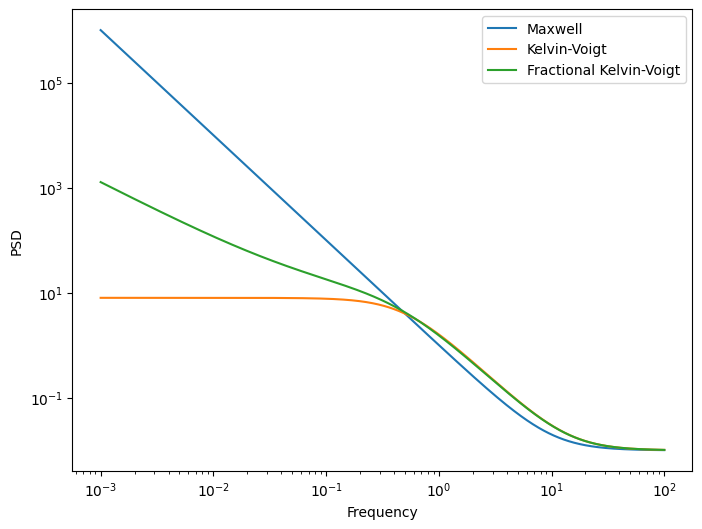

In [2]:
#plot the PSD of the idfferent models
fig, ax = plt.subplots(1,1, figsize=(8,6))
min_freq = 0.001
max_freq = 100
freq = np.logspace(np.log10(min_freq), np.log10(max_freq), 1000)
A = .5
B = 1.
alpha = .1
beta = 1
noise = 0.01
PSD_maxwell = PSD(freq, G_Maxwell, [A, B,noise])
plt.plot(freq, PSD_maxwell, label='Maxwell')
PSD_kv = PSD(freq, G_Kelvin_Voigt, [A, B,noise])
plt.plot(freq, PSD_kv, label='Kelvin-Voigt')
PSD_fkv = PSD(freq, G_fractional_Kelvin_Voigt, [A, B, alpha, beta, noise])
plt.plot(freq, PSD_fkv, label='Fractional Kelvin-Voigt')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()

In [3]:
simulation_time =int( 1/min_freq)
sampling_steps = int(simulation_time*max_freq*2)

log_weighted = True
unweighted_postfit = True

maxwell_data = Data(*simulate_trajectory(simulation_time,sampling_steps, G_Maxwell, [A, B, noise]), name='Maxwell', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)
kelvin_voit_data= Data(*simulate_trajectory(simulation_time,sampling_steps, G_Kelvin_Voigt, [A, B, noise]), name='Kelvin-Voigt', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)
fractional_kelvin_voigt_data=Data(*simulate_trajectory(simulation_time,sampling_steps, G_fractional_Kelvin_Voigt, [A, B, alpha, beta, noise]), name='Fractional Kelvin-Voigt', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)

Data_list = [maxwell_data, kelvin_voit_data, fractional_kelvin_voigt_data]

c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\models.py:15: RuntimeWarning: divide by zero encountered in divide
  psd = np.where(omega == 0, 0, -2 * kbT / omega * np.imag(1/G(omega, *G_args)) + noise)
c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\models.py:9: RuntimeWarning: divide by zero encountered in divide
  return 1/(A /((1j * omega)) + B)
c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\models.py:9: RuntimeWarning: invalid value encountered in divide
  return 1/(A /((1j * omega)) + B)
c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\models.py:15: RuntimeWarning: invalid value encountered in divide
  psd = np.where(omega == 0, 0, -2 * kbT / omega * np.imag(1/G(omega, *G_args)) + noise)
c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\models.py:15: RuntimeWarning: invalid value encountered in multiply


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


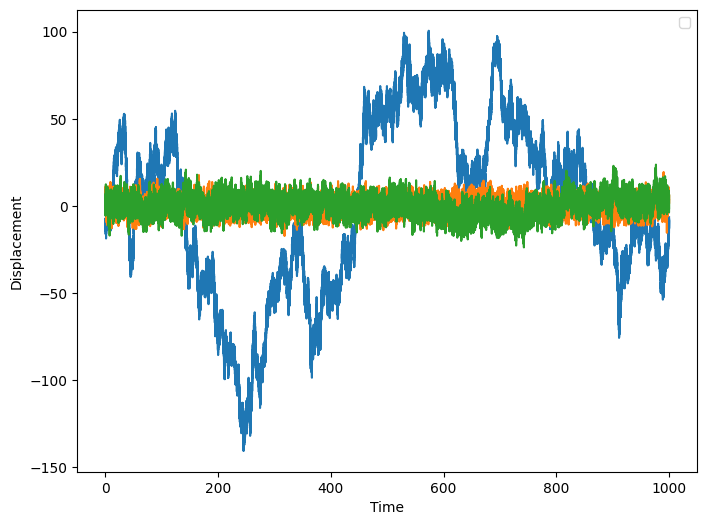

In [4]:
#plot the trajectory    
fig, ax = plt.subplots(1,1, figsize=(8,6))
for data in Data_list:
    data.plot_x(ax)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show()

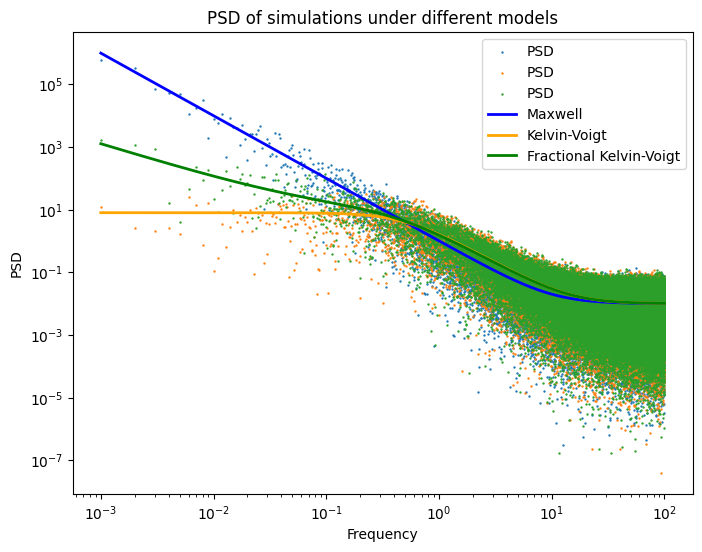

In [5]:
for data in Data_list:
    data.create_PSD()
#plot the PSD of the idfferent models
point_size = .5
fig, ax = plt.subplots(1,1, figsize=(8,6))
for data in Data_list:
    data.plot_psd(ax)
plt.plot(freq, PSD_maxwell, color = "blue",linewidth = 2, label='Maxwell')
plt.plot(freq, PSD_kv, color = "orange",linewidth = 2, label='Kelvin-Voigt')
plt.plot(freq, PSD_fkv, color = "green",linewidth = 2, label='Fractional Kelvin-Voigt')
plt.title('PSD of simulations under different models')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()


In [6]:
#make all the fits for all the data
for data in Data_list:
    data.create_NLL_maxwell()
    data.create_NLL_kelvin_voigt()
    data.create_NLL_fractional_kelvin_voigt()

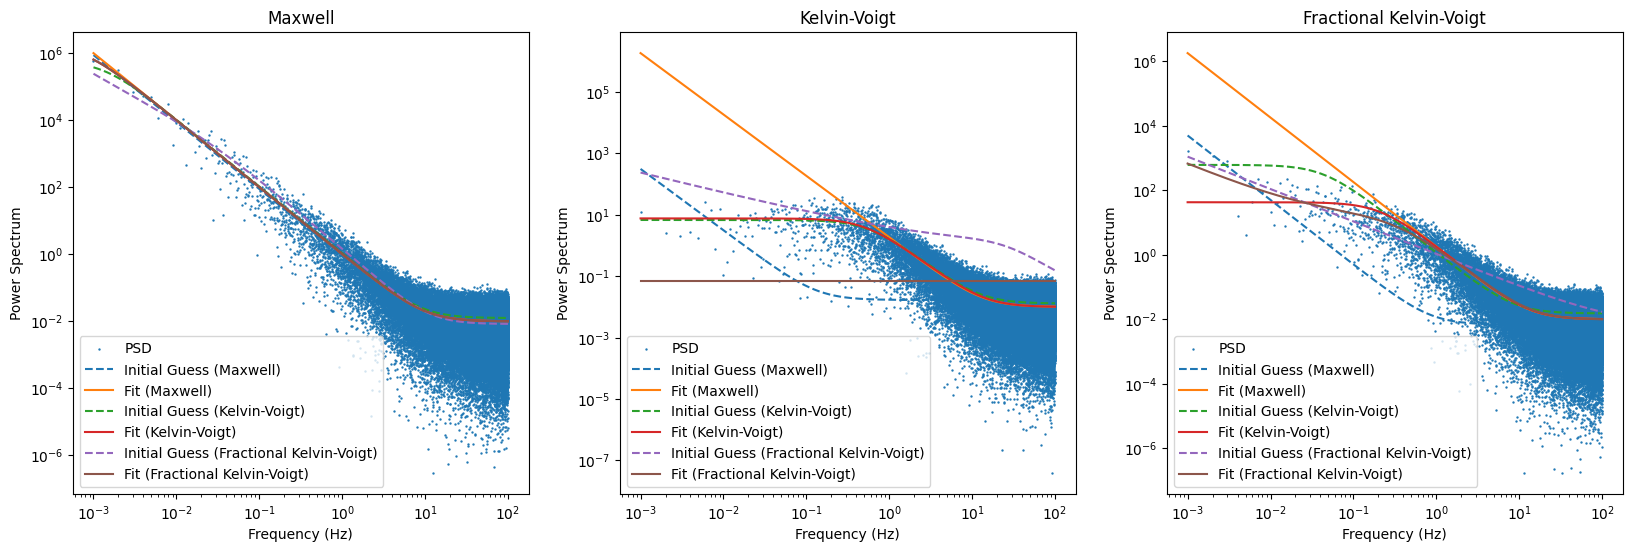

In [7]:
#make one plot for each data in a row. In each plot, plot the data and the fits

fig, ax = plt.subplots(1,3, figsize=(20,6))
data_names = ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt']
for i, data in enumerate(Data_list):
    #make title
    ax[i].set_title(data_names[i])
    data.plot_psd(ax[i])
    

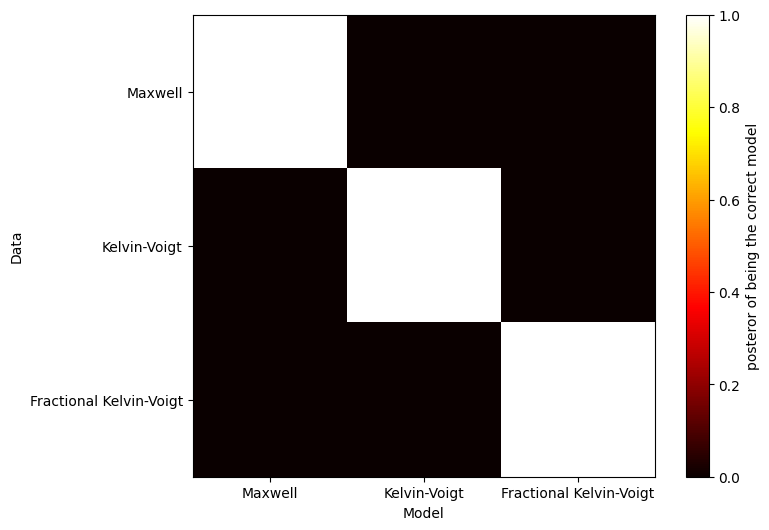

In [8]:
#make a matrix colormap with data on the one axis and models on the other axis. In each cell, plot the NLL of the model for the data
posteror_matrix = np.zeros((len(Data_list),3))
for i, data in enumerate(Data_list):
    data.bayesian_update()
    posteror_matrix[i,0] = data.posterior_maxwell
    posteror_matrix[i,1] = data.posterior_kelvin_voigt
    posteror_matrix[i,2] = data.posterior_fractional_kelvin_voigt

fig, ax = plt.subplots(1,1, figsize=(8,6))
im = ax.imshow(posteror_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(im, ax=ax, label='posteror of being the correct model')
plt.xlabel('Model')
plt.ylabel('Data')
plt.xticks([0,1,2], ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt'])
plt.yticks([0,1,2], ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt'])
plt.show()


In [9]:
# print the fit parameters and the posteror of the models
for data in Data_list:
    print(data.name)
    print('Maxwell:', data.posterior_maxwell)
    print('Kelvin-Voigt:', data.posterior_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.posterior_fractional_kelvin_voigt)
    print('Maxwell:', data.fit_maxwell)
    print('Kelvin-Voigt:', data.fit_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.fit_fractional_kelvin_voigt)
    print('')

Maxwell
Maxwell: 0.9965280918709782
Kelvin-Voigt: 0.0034718734102876583
Fractional Kelvin-Voigt: 3.4718734034834815e-08
Maxwell: [0.5070234  1.00044504 0.00998644]
Kelvin-Voigt: [1.47604621e-03 1.97204382e+00 9.98642744e-03]
Fractional Kelvin-Voigt: [0.0014760030952591123, 1.972042555699922, 1.499467532944549e-10, 0.9999999999503293, 0.009986425286071908]

Kelvin-Voigt
Maxwell: 0.0
Kelvin-Voigt: 1.0
Fractional Kelvin-Voigt: 0.0
Maxwell: [0.92385712 1.00359689 0.01006777]
Kelvin-Voigt: [0.51124413 0.99688867 0.0099642 ]
Fractional Kelvin-Voigt: [0.08803997368307291, 3.39292903677812e-17, 1.8848982541954268e-20, 3.258931790153629e-19, 0.07117402286663423]

Fractional Kelvin-Voigt
Maxwell: 1.65934400656901e-201
Kelvin-Voigt: 4.304284011830486e-67
Fractional Kelvin-Voigt: 1.0
Maxwell: [0.90503739 1.00090542 0.01014247]
Kelvin-Voigt: [0.22246472 1.06644921 0.01009724]
Fractional Kelvin-Voigt: [0.4071010240410628, 1.0766489372462045, 0.05670025483536606, 0.9629342368856615, 0.009964508303711

In [11]:
# print the fit parameters and the posteror of the models
for data in Data_list:
    print(data.name)
    print('Maxwell:', data.posterior_maxwell)
    print('Kelvin-Voigt:', data.posterior_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.posterior_fractional_kelvin_voigt)
    print('Maxwell:', data.fit_maxwell)
    print('Kelvin-Voigt:', data.fit_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.fit_fractional_kelvin_voigt)
    print('')

Maxwell
Maxwell: 0.9965280918709782
Kelvin-Voigt: 0.0034718734102876583
Fractional Kelvin-Voigt: 3.4718734034834815e-08
Maxwell: [0.5070234  1.00044504 0.00998644]
Kelvin-Voigt: [1.47604621e-03 1.97204382e+00 9.98642744e-03]
Fractional Kelvin-Voigt: [0.0014760030952591123, 1.972042555699922, 1.499467532944549e-10, 0.9999999999503293, 0.009986425286071908]

Kelvin-Voigt
Maxwell: 0.0
Kelvin-Voigt: 1.0
Fractional Kelvin-Voigt: 0.0
Maxwell: [0.92385712 1.00359689 0.01006777]
Kelvin-Voigt: [0.51124413 0.99688867 0.0099642 ]
Fractional Kelvin-Voigt: [0.08803997368307291, 3.39292903677812e-17, 1.8848982541954268e-20, 3.258931790153629e-19, 0.07117402286663423]

Fractional Kelvin-Voigt
Maxwell: 1.65934400656901e-201
Kelvin-Voigt: 4.304284011830486e-67
Fractional Kelvin-Voigt: 1.0
Maxwell: [0.90503739 1.00090542 0.01014247]
Kelvin-Voigt: [0.22246472 1.06644921 0.01009724]
Fractional Kelvin-Voigt: [0.4071010240410628, 1.0766489372462045, 0.05670025483536606, 0.9629342368856615, 0.009964508303711